## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

## Data Preparation

In [23]:
df_purchase = pd.read_csv('C:\\Users\\akhan\\Desktop\\python_class\\purchase data.csv')
df_price_elasticities = pd.read_csv('C:\\Users\\akhan\\Desktop\\python_class\\df_price_elasticities.csv')

scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## ${\textbf{Brand Choice}}$

### Data Preparation

In [24]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [25]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,0,1,0,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,0,1,0,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,0,1,0,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,0,1,0,0,0


In [26]:
Y = brand_choice['Brand']

In [27]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [28]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [29]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [30]:
model_brand_choice.coef_

array([[-3.91593853,  0.6584671 ,  2.41779507,  0.70410063, -0.20208546],
       [ 1.27462011, -1.87985275, -0.2126226 , -0.20633481,  0.58787771],
       [ 1.62414483,  0.56209401,  0.50073859,  1.03947334,  0.4527414 ],
       [ 0.57454618,  0.39559075, -1.40058126, -1.246237  ,  0.24935925],
       [ 0.4426274 ,  0.26370088, -1.3053298 , -0.29100215, -1.08789289]])

In [31]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915939,0.658467,2.417795,0.704101,-0.202085
1,1.274620,-1.879853,-0.212623,-0.206335,0.587878
2,1.624145,0.562094,0.500739,1.039473,0.452741
3,0.574546,0.395591,-1.400581,-1.246237,0.249359
4,0.442627,0.263701,-1.305330,-0.291002,-1.087893


In [32]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


### ** Analysis: 
brand 1: increasing price of barnd 1 will reduce the probability that customers buy this brand (-3.92 coefficient).
    on the other hand, price increase in brand 1, will increase probability of brands 2, 3 and 4 (positive coefficients)

## Own Price Elasticity Brand 5

### ** own price elasticity:
own price elasticity means just that brand's price is changing, other prices are constant.

In [33]:
price_range = np.arange(0.5, 3.5, 0.01)

In [34]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [35]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [36]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [37]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [38]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [39]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Unnamed: 0,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0,0.50,-0.096380,-0.032264,-0.119831,-0.211177,-0.179886,-0.125722,-0.195637,-0.049055
1,1,0.51,-0.100447,-0.034094,-0.124052,-0.217747,-0.185483,-0.129838,-0.201758,-0.050616
2,2,0.52,-0.104642,-0.036013,-0.128369,-0.224425,-0.191171,-0.134032,-0.207981,-0.052206
3,3,0.53,-0.108966,-0.038026,-0.132782,-0.231212,-0.196952,-0.138307,-0.214308,-0.053827
4,4,0.54,-0.113424,-0.040135,-0.137292,-0.238108,-0.202826,-0.142662,-0.220739,-0.055477
5,5,0.55,-0.118019,-0.042347,-0.141902,-0.245114,-0.208794,-0.147100,-0.227275,-0.057158
6,6,0.56,-0.122753,-0.044663,-0.146612,-0.252230,-0.214856,-0.151620,-0.233916,-0.058870
7,7,0.57,-0.127631,-0.047091,-0.151425,-0.259459,-0.221013,-0.156224,-0.240664,-0.060614
8,8,0.58,-0.132655,-0.049633,-0.156342,-0.266799,-0.227266,-0.160914,-0.247519,-0.062391
9,9,0.59,-0.137830,-0.052296,-0.161363,-0.274252,-0.233615,-0.165689,-0.254483,-0.064199


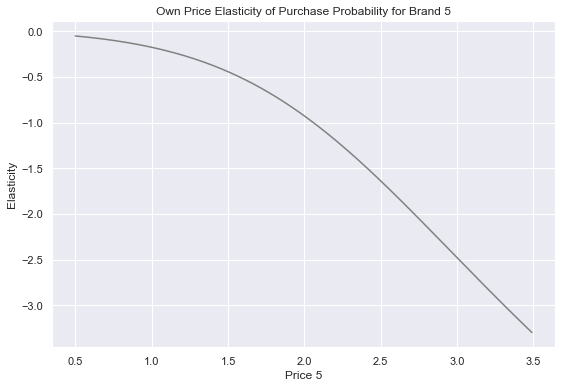

In [40]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')
plt.show()

## Cross Price Elasticity Brand 5, Cross Brand 4

### ** cross price elasticity:
we are interested to evaluate how price change of a competitor brand (brand 4) would affect our own brand (brand 5) purchase probability. In this experiment our price is set to be constant and competitor brand price is variable. Note that formula of cross elasticity is a bit different than own elasticity.

In [41]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [42]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [43]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [44]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [45]:
beta5

-1.09

In [46]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [47]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Unnamed: 0,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0,0.50,-0.096380,-0.032264,-0.119831,-0.211177,-0.179886,-0.125722,-0.195637,-0.049055,0.332011
1,1,0.51,-0.100447,-0.034094,-0.124052,-0.217747,-0.185483,-0.129838,-0.201758,-0.050616,0.337287
2,2,0.52,-0.104642,-0.036013,-0.128369,-0.224425,-0.191171,-0.134032,-0.207981,-0.052206,0.342507
3,3,0.53,-0.108966,-0.038026,-0.132782,-0.231212,-0.196952,-0.138307,-0.214308,-0.053827,0.347669
4,4,0.54,-0.113424,-0.040135,-0.137292,-0.238108,-0.202826,-0.142662,-0.220739,-0.055477,0.352773
5,5,0.55,-0.118019,-0.042347,-0.141902,-0.245114,-0.208794,-0.147100,-0.227275,-0.057158,0.357820
6,6,0.56,-0.122753,-0.044663,-0.146612,-0.252230,-0.214856,-0.151620,-0.233916,-0.058870,0.362809
7,7,0.57,-0.127631,-0.047091,-0.151425,-0.259459,-0.221013,-0.156224,-0.240664,-0.060614,0.367741
8,8,0.58,-0.132655,-0.049633,-0.156342,-0.266799,-0.227266,-0.160914,-0.247519,-0.062391,0.372614
9,9,0.59,-0.137830,-0.052296,-0.161363,-0.274252,-0.233615,-0.165689,-0.254483,-0.064199,0.377430


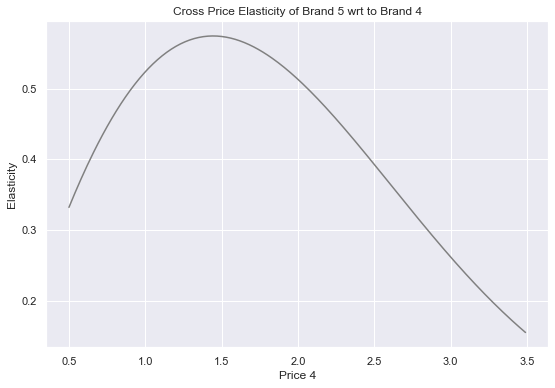

In [48]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')
plt.show()

### ** Analysis:
Elasticity is positive, it means if price of 4 increases, the purchase probability of our brand (brand 5) would increase and brand 4 customers would substitute brand 4 with brand 5. 
Moreover, the increase in purchase probability is the highest around brand 4 price of 1.4, and then it decreases (but remains positive)

## Own and Cross-Price Elasticity by Segment

### $\color{orange}{\text{Well-Off}}$

In [49]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [50]:
# model estimation
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

#coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.78,0.13,-0.10
Price_2,-0.95,-1.37,1.24,0.79,0.29
Price_3,2.00,-1.67,-0.41,-0.01,0.09
Price_4,2.52,0.95,-0.20,-1.92,-1.34
Price_5,-1.00,-0.30,1.18,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [51]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [52]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Unnamed: 0,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0,0.50,-0.096380,-0.032264,-0.119831,-0.211177,-0.179886,-0.125722,-0.195637,-0.049055,0.332011,-0.298408,0.482872
1,1,0.51,-0.100447,-0.034094,-0.124052,-0.217747,-0.185483,-0.129838,-0.201758,-0.050616,0.337287,-0.304466,0.492184
2,2,0.52,-0.104642,-0.036013,-0.128369,-0.224425,-0.191171,-0.134032,-0.207981,-0.052206,0.342507,-0.310535,0.501481
3,3,0.53,-0.108966,-0.038026,-0.132782,-0.231212,-0.196952,-0.138307,-0.214308,-0.053827,0.347669,-0.316613,0.510761
4,4,0.54,-0.113424,-0.040135,-0.137292,-0.238108,-0.202826,-0.142662,-0.220739,-0.055477,0.352773,-0.322702,0.520026
5,5,0.55,-0.118019,-0.042347,-0.141902,-0.245114,-0.208794,-0.147100,-0.227275,-0.057158,0.357820,-0.328803,0.529275
6,6,0.56,-0.122753,-0.044663,-0.146612,-0.252230,-0.214856,-0.151620,-0.233916,-0.058870,0.362809,-0.334914,0.538507
7,7,0.57,-0.127631,-0.047091,-0.151425,-0.259459,-0.221013,-0.156224,-0.240664,-0.060614,0.367741,-0.341038,0.547723
8,8,0.58,-0.132655,-0.049633,-0.156342,-0.266799,-0.227266,-0.160914,-0.247519,-0.062391,0.372614,-0.347174,0.556923
9,9,0.59,-0.137830,-0.052296,-0.161363,-0.274252,-0.233615,-0.165689,-0.254483,-0.064199,0.377430,-0.353322,0.566106


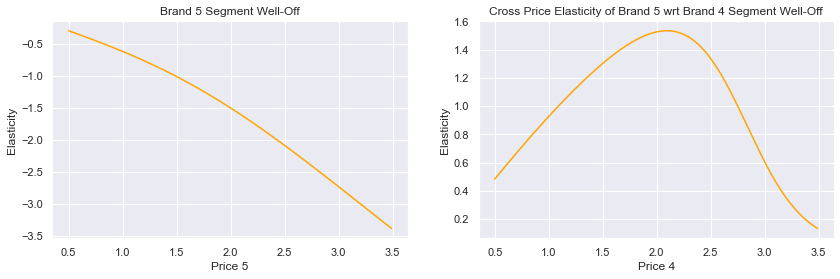

In [53]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### **Analysis: 
1) well off segment is elastic towards brand 5 (as their favorite brand is brand 4)
2) if brand 4 decreases its price by 1 percent at price of 2, our brand probability would decrease by 1.5%. If we also decrease our brand price by 1% at price 2, then the probability of our brand increases by 2%. As a result of this strategy, the purchase probability of our brand would increase by 2% - 1.5% = +0.5%. 
Note: if we wouldn't react to competitor price reduction, we would lose 1.5% purchase probability.

### $\color{blue}{\text{Standard}}$

In [54]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 2]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,2,0,0,1,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,2,0,0,1,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,2,0,0,1,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,2,0,0,1,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,2,0,0,1,0


In [55]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [56]:
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [57]:
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### $\color{green}{\text{Career-Focused}}$

In [58]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [59]:
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [60]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [61]:
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

### $\color{red}{\text{Fewer-Opportunities}}$

In [64]:
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 0]

In [65]:
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [66]:
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [67]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Unnamed: 0,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0,0.50,-0.096380,-0.032264,-0.119831,-0.211177,-0.179886,-0.125722,-0.195637,-0.049055,-0.115839,0.174125,-0.039243,0.196463,-0.001038,0.172841,0.332011,-0.298408,0.482872
1,1,0.51,-0.100447,-0.034094,-0.124052,-0.217747,-0.185483,-0.129838,-0.201758,-0.050616,-0.118879,0.176180,-0.040245,0.198958,-0.001100,0.175112,0.337287,-0.304466,0.492184
2,2,0.52,-0.104642,-0.036013,-0.128369,-0.224425,-0.191171,-0.134032,-0.207981,-0.052206,-0.121952,0.178185,-0.041256,0.201402,-0.001165,0.177339,0.342507,-0.310535,0.501481
3,3,0.53,-0.108966,-0.038026,-0.132782,-0.231212,-0.196952,-0.138307,-0.214308,-0.053827,-0.125062,0.180139,-0.042277,0.203794,-0.001233,0.179522,0.347669,-0.316613,0.510761
4,4,0.54,-0.113424,-0.040135,-0.137292,-0.238108,-0.202826,-0.142662,-0.220739,-0.055477,-0.128206,0.182042,-0.043309,0.206134,-0.001305,0.181662,0.352773,-0.322702,0.520026
5,5,0.55,-0.118019,-0.042347,-0.141902,-0.245114,-0.208794,-0.147100,-0.227275,-0.057158,-0.131387,0.183895,-0.044350,0.208424,-0.001381,0.183759,0.357820,-0.328803,0.529275
6,6,0.56,-0.122753,-0.044663,-0.146612,-0.252230,-0.214856,-0.151620,-0.233916,-0.058870,-0.134605,0.185699,-0.045401,0.210664,-0.001461,0.185813,0.362809,-0.334914,0.538507
7,7,0.57,-0.127631,-0.047091,-0.151425,-0.259459,-0.221013,-0.156224,-0.240664,-0.060614,-0.137859,0.187454,-0.046463,0.212853,-0.001545,0.187824,0.367741,-0.341038,0.547723
8,8,0.58,-0.132655,-0.049633,-0.156342,-0.266799,-0.227266,-0.160914,-0.247519,-0.062391,-0.141151,0.189159,-0.047535,0.214993,-0.001634,0.189793,0.372614,-0.347174,0.556923
9,9,0.59,-0.137830,-0.052296,-0.161363,-0.274252,-0.233615,-0.165689,-0.254483,-0.064199,-0.144481,0.190816,-0.048617,0.217083,-0.001727,0.191719,0.377430,-0.353322,0.566106


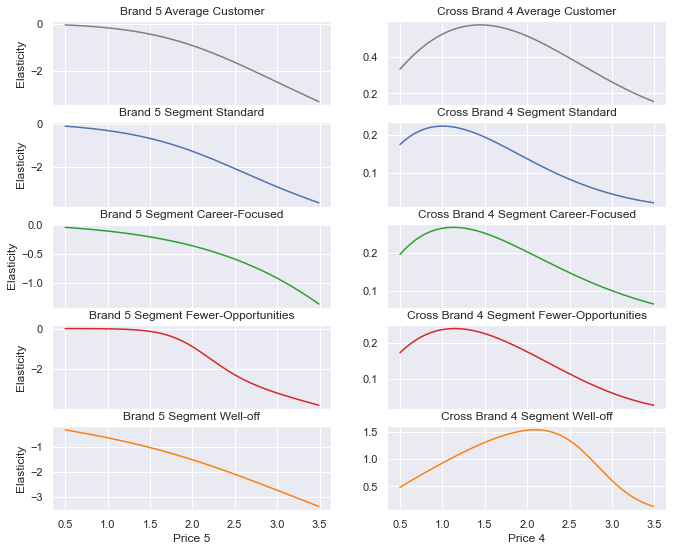

In [68]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')
plt.show()

## **Analysis of brand choice:
1) The career focused segment is the least elastic segment towards price changes of barnd 5, so they are loyal customers of our brand. (small negative elasticity)
2) As we know from descriptive analysis, standard and fewer opportunities segements are not very interested in expensive brands like 4 and 5 and we dont need to focus on them.
3) The interesting segments are career focused and well off segements. As the career focused is the loyal customer, marketing efforts should be focused on attracting customers from segemnet 5. with a small price reduction we can attract many new customers from well-off segment. Also we should react to price change of our competitor brand (brand 4) with certain price strategies.